In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')

## SVD
### Singular Value Decomposition

(-20, 20)

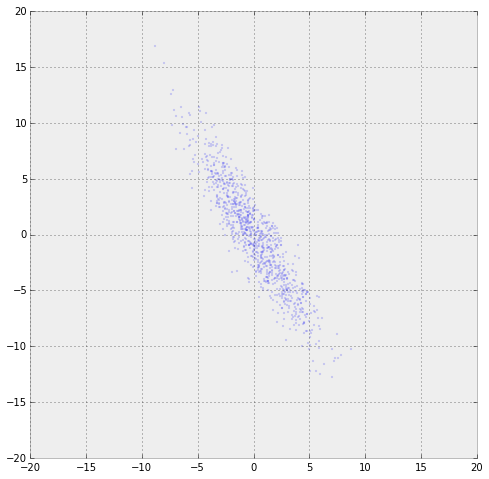

In [7]:
## An example of using SVD to determine the principal directions
## of a cloud of random points

# Two unit vectors, pointing at 30 degrees and 120 degrees
# counter-clockwise from the positive x axis:
a = np.array([
        np.sqrt(3)/2,
               1.0/2
    ])
b = np.array([
              -1.0/2,
        np.sqrt(3)/2
    ])

# Create an "elliptical" distribution of Gaussian random numbers,
# with sigma = 1 along a and sigma = 5 along b:
N = 1000
R = np.zeros((2, N))
for i in range(N):
    R[:,i] = np.random.normal(loc=0, scale=1)*a \
           + np.random.normal(loc=0, scale=5)*b
        
# Plot the cloud of points
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
plt.scatter(R[0,:], R[1,:], marker = '.', alpha = 0.2)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

[ 158.9977474    31.65146287]


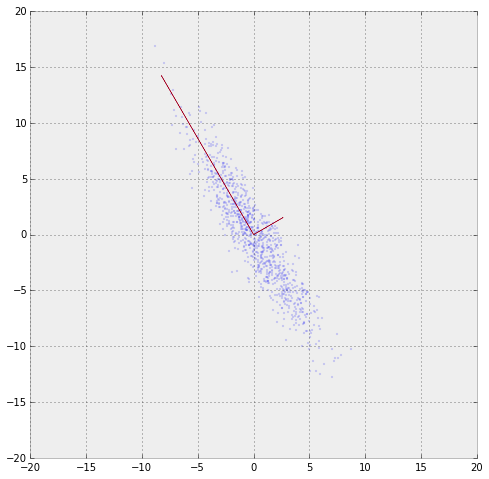

In [15]:
# Take the SVD of R
U, S, V = np.linalg.svd(R)

# Plot the point cloud
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
plt.scatter(R[0,:], R[1,:], marker = '.', alpha = 0.2)

# Plot the two left singular vectors given by U, scaled by the corresponding
# singular value.
c = 1/10
plt.arrow(0, 0, c*S[0]*U[0,0], c*S[0]*U[0,1], color = '#A60628')
plt.arrow(0, 0, c*S[1]*U[1,0], c*S[1]*U[1,1], color = '#A60628')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

(-20, 20)

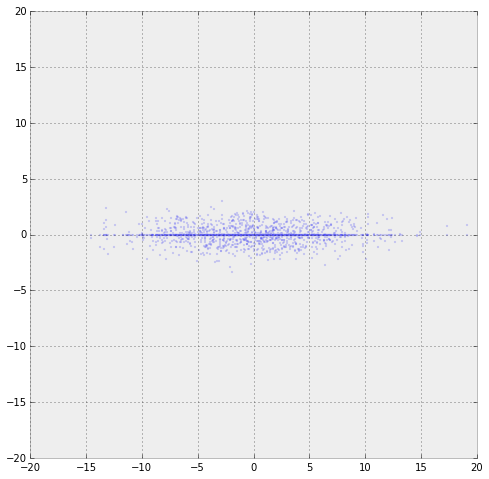

In [12]:
## Using the first left singular vector to find the angle
## between the principal direction of the cloud and the x axis,
## then rotating the cloud of points to align with the x axis.

## This is perhaps not terribly useful for points in two dimensions,
## but for a high dimensional dataset (D = 100, say), this can
## be a very convenient approach to visualisation.
## Look up the technique known as Principal Component Analysis (PCA)
## for more details.

theta = np.arctan2(U[1,0], U[0,0])
r = np.array([[ np.cos(theta),  np.sin(theta) ],
              [ np.sin(theta), -np.cos(theta) ]])

R_rot = np.zeros(R.shape)
for i in range(R.shape[1]):
    R_rot[:,i] = np.dot(r, R[:,i])

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')

# Plot the rotated point cloud
plt.scatter(R_rot[0,:], R_rot[1,:], marker = '.', alpha = 0.2)

# Plot the same points with y=0. The point of this is that the
# points have been rotated in such a way that most of the variation
# between the points (the principal component) is captured by the
# x coordinate. Plotting with y=0 is the same as plotting the projection
# onto the x axis. Again, this is perhaps not super-duper useful in 2D,
# but very useful for higher dimensional data.
plt.scatter(R_rot[0,:], [0]*R_rot.shape[1], marker = '.', alpha = 0.2)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

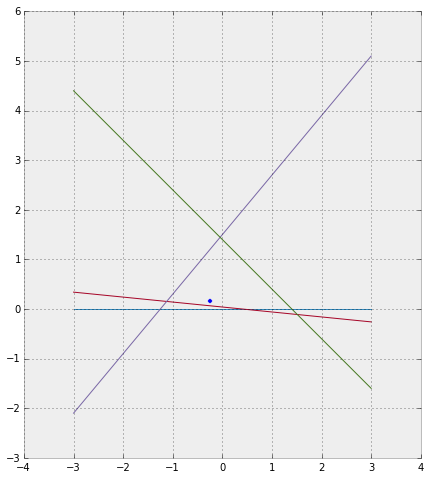

In [19]:
## An example of an equation system with four equations and 
## only two unknowns.
A = np.array([
        [0, 1],
        [0.5, 5],
        [-1.2, 1],
        [1, 1]
    ])
b = np.array([0,0.2,1.5,1.4])

# Visualise the equation system as four lines, intersecting
# in several different points. The system does not have a solution.
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
# x0 is just to help plot the lines from x = -3 to x = 3.
x0 = np.linspace(-3, 3, 2)
for i, row in enumerate(A):
    ax.plot(x0, -x0 * row[0] / row[1] + b[i] / row[1], lw = 1)

# Calculate the pseudoinverse
Ai = np.linalg.pinv(A)
# Find an "approximate solution" by multiplying
# the right hand side with the pseudoinverse.
x  = np.dot(Ai, b)
# Plot the point found by the pseudoinverse
ax.scatter(x[0], x[1])

(756, 756, 3)


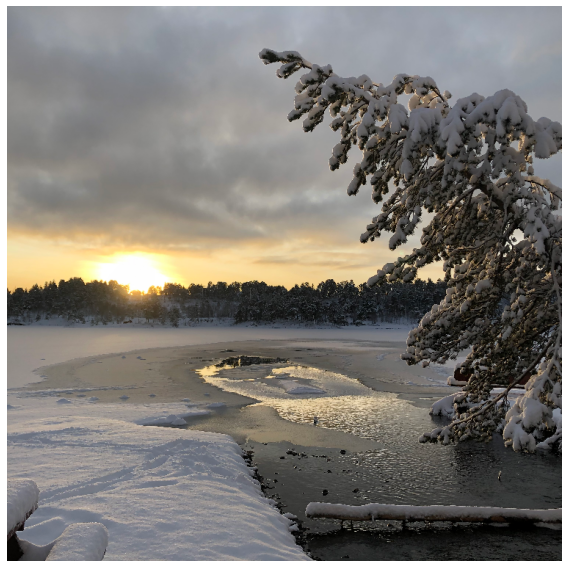

In [2]:
Nskip = 4
img=mpimg.imread('/Users/torn/Desktop/IMG_1598 (1).png')[:,550:550+3024,:][::Nskip,::Nskip,:]
#img=mpimg.imread('/Users/torn/Desktop/IMG_1361.png')[100:1060,:,:][::Nskip,::Nskip,:]
#img = mpimg.imread('https://www.python.org/static/img/python-logo@2x.png')[:,:,:]
print(img.shape)
plt.figure(figsize = (12,8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'svd_full.png')

In [8]:
Nskip = 4
img=mpimg.imread('/Users/torn/Desktop/IMG_1598 (1).png')[:,550:550+3024,:][::Nskip,::Nskip,:]
U, S, V = np.linalg.svd(img.T)
U.shape

(3, 756, 756)

In [19]:
from ipywidgets import interact, IntSlider
%matplotlib notebook

In [20]:
def svd_plotter(n):
    plt.imshow(np.stack((
        np.dot(U[0,:,:n], S[0,:n,None]*V[0,:n,:]).T,
        np.dot(U[1,:,:n], S[1,:n,None]*V[1,:n,:]).T,
        np.dot(U[2,:,:n], S[2,:n,None]*V[2,:n,:]).T,
        np.dot(U[3,:,:n], S[3,:n,None]*V[3,:n,:]).T,
    ), axis = -1))
#np.tensordot(U[:,:,:n], S[:,:n,None]*V[:,:n,:], axes = ((2), (1))).shape


Nskip = 4
img=mpimg.imread('/Users/torn/Desktop/IMG_1598 (1).png')[:,550:550+3024,:][::Nskip,::Nskip,:]
U, S, V = np.linalg.svd(img.T)
def svd_plotter(n):
    plt.imshow((U[:,:,:n] @ (S[:,:n,None]*V[:,:n,:])).T)
    plt.tight_layout()


In [21]:
slider = interact(svd_plotter, n = IntSlider(min=1, max=100, step=1, continuous_update = False))

interactive(children=(IntSlider(value=1, continuous_update=False, description='n', min=1), Output()), _dom_cla…

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


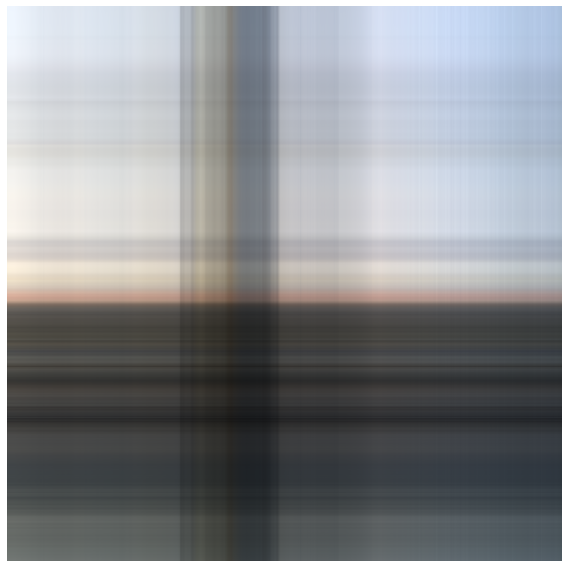

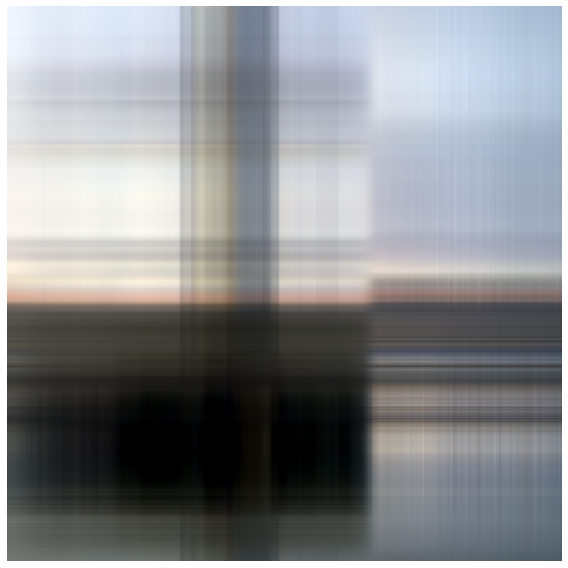

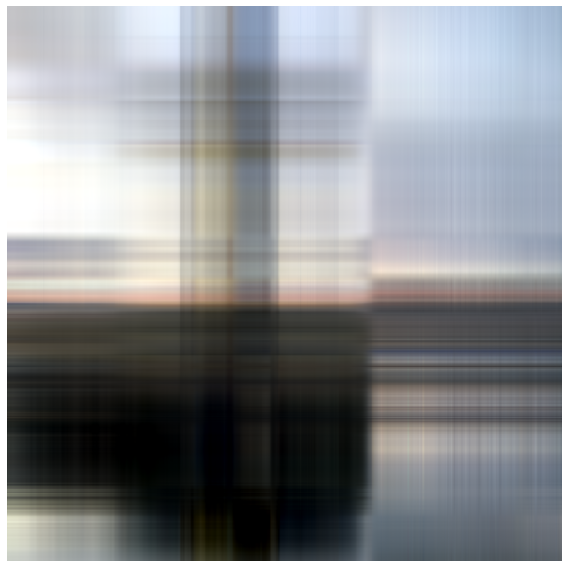

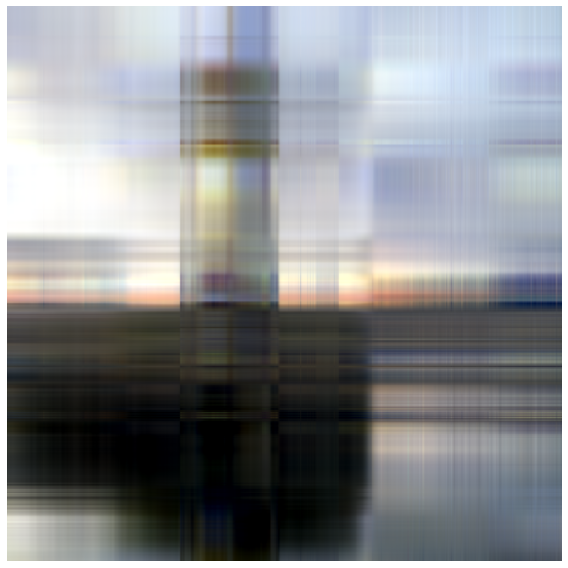

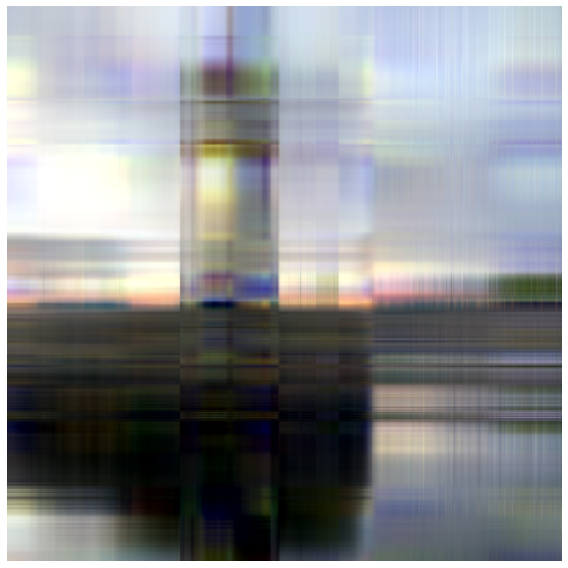

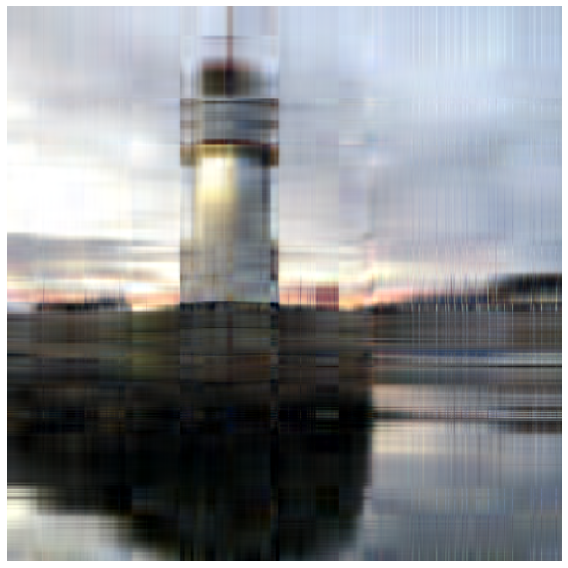

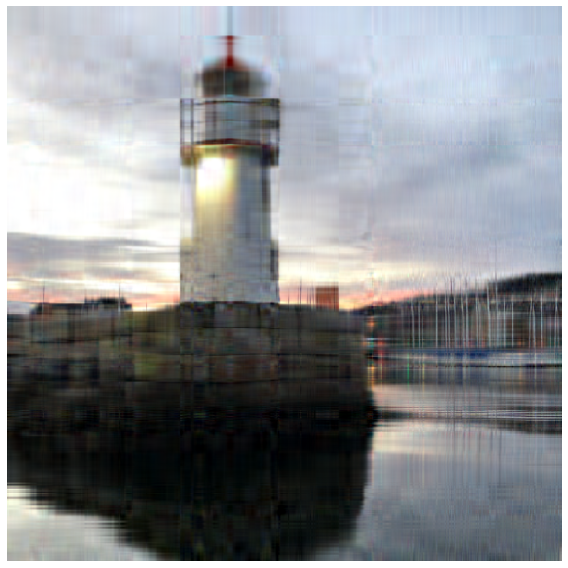

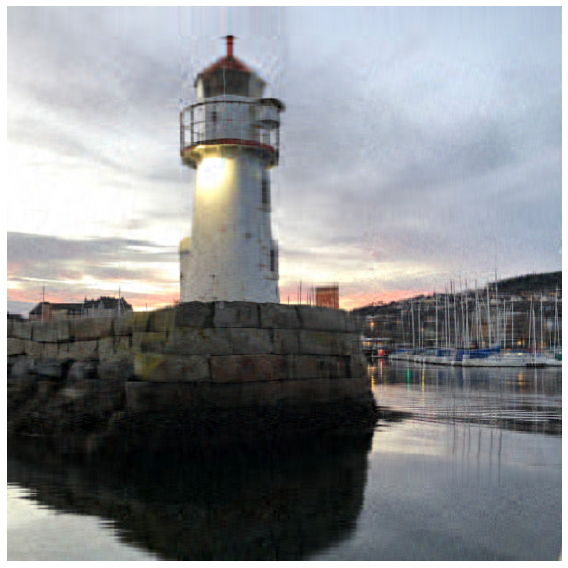

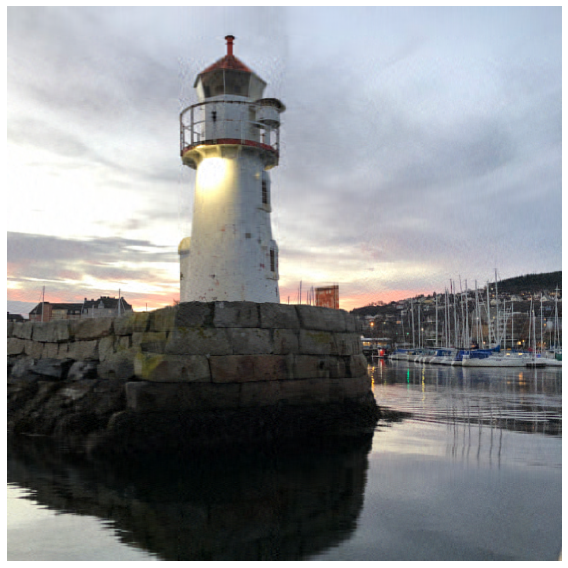

In [25]:
# Take the SVD of R
Ur, Sr, Vr = np.linalg.svd(img[:,:,0])
Ug, Sg, Vg = np.linalg.svd(img[:,:,1])
Ub, Sb, Vb = np.linalg.svd(img[:,:,2])

for n in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    compressed_image = np.stack([
        sum([np.outer(Ur[:,i], Sr[i]*Vr[i,:]) for i in range(n)]),
        sum([np.outer(Ug[:,i], Sg[i]*Vg[i,:]) for i in range(n)]),
        sum([np.outer(Ub[:,i], Sb[i]*Vb[i,:]) for i in range(n)]),
    ], axis = -1)

    compressed_image.shape

    plt.figure(figsize = (12,8))
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'svd_{n}.png')

In [77]:
%timeit x = np.stack((np.dot(U[0,:,:n], S[0,:n,None]*V[0,:n,:]).T, np.dot(U[1,:,:n], S[1,:n,None]*V[1,:n,:]).T, np.dot(U[2,:,:n], S[2,:n,None]*V[2,:n,:]).T,), axis = -1)

5.1 ms ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
np.stack((
    np.dot(U[0,:,:n], S[0,:n,None]*V[0,:n,:]).T,
    np.dot(U[1,:,:n], S[1,:n,None]*V[1,:n,:]).T,
    np.dot(U[2,:,:n], S[2,:n,None]*V[2,:n,:]).T,
), axis = -1).shape

(960, 960, 3)

In [124]:
np.tensordot(U[:,:,:n], S[:,:n,None]*V[:,:n,:], axes = ((2), (1))).T.shape

(164, 4, 580, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 580, 50)
(4, 50, 164)
(4, 580, 164)


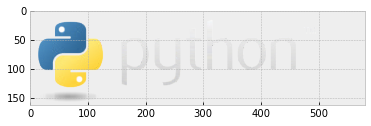

In [134]:
print(U[:,:,:n].shape)
print((S[:,:n,None]*V[:,:n,:]).shape)
#np.dot(U[:,:,:n], S[:,:n,None]*V[:,:n,:]).shape
print(np.einsum('...ij,...jk->...ik', U[:,:,:n], S[:,:n,None]*V[:,:n,:]).shape)

plt.imshow(np.einsum('...ij,...jk->ki...', U[:,:,:n], S[:,:n,None]*V[:,:n,:]))

TypeError: Invalid shape (164, 4, 580) for image data

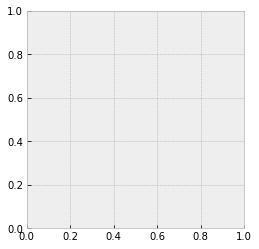

In [108]:
plt.imshow(a, axis = 0).T)

In [84]:
print(U[:,:,:n].shape)
print(V[:,:n,:].shape)
print((S[:,:n,None]*V[:,:n,:]).shape)

(3, 960, 50)
(3, 50, 960)
(3, 50, 960)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 579.5, 163.5, -0.5)

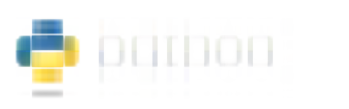

In [105]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

img = mpimg.imread('https://www.python.org/static/img/python-logo@2x.png')
# img has shape (164, 580, 4)

U, S, V = np.linalg.svd(img.T)
# U has shape (4, 580, 580)
# S has shape (4, 164)
# V has shape (4, 164, 164)

# Reconstruct image with the first N vectors
N = 3
img_reconstructed = np.stack((
    np.dot(U[0,:,:N], S[0,:N,None]*V[0,:N,:]).T, # Red channel
    np.dot(U[1,:,:N], S[1,:N,None]*V[1,:N,:]).T, # Green channel
    np.dot(U[2,:,:N], S[2,:N,None]*V[2,:N,:]).T, # Blue channel
    np.dot(U[3,:,:N], S[3,:N,None]*V[3,:N,:]).T, # alpha channel
), axis = -1)
# img_reconstructed has shape (164, 580, 4), 
# just like the original image

plt.imshow(img_reconstructed)

In [112]:
img_reconstructed.T.shape

(4, 580, 164)

In [149]:
%timeit x = np.einsum('...ij,...jk->...ik', U[:,:,:n], S[:,:n,None]*V[:,:n,:])

12.3 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [172]:
%timeit x = np.stack((np.dot(U[0,:,:n], S[0,:n,None]*V[0,:n,:]).T, np.dot(U[1,:,:n], S[1,:n,None]*V[1,:n,:]).T, np.dot(U[2,:,:n], S[2,:n,None]*V[2,:n,:]).T,), axis = -1)

409 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [137]:
(S[:,:n,None]*V[:,:n,:]).shape

(4, 50, 164)

In [138]:
np.dot(S[:,:n], V[:,:n,:]).shape

(4, 4, 164)

In [142]:
np.einsum('...i,...ij->...ij', S[:,:n], V[:,:n,:]).shape

(4, 50, 164)

In [143]:
x = np.einsum('...i,...ij->...ij', S[:,:n], V[:,:n,:])
y = S[:,:n,None]*V[:,:n,:]
np.allclose(x,y)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


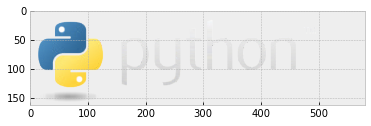

In [152]:
plt.imshow(np.einsum('...ij,...jk->...ik', U[:,:,:n], S[:,:n,None]*V[:,:n,:]).T)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


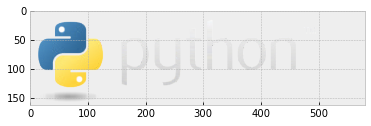

In [153]:
mg_reconstructed = np.einsum('...ij,...jk->ki...', U[:,:,:n], S[:,:n,None]*V[:,:n,:])
plt.imshow(mg_reconstructed)

In [157]:
%timeit img_reconstructed = (U[:,:,:N] @ (S[:,:N,None]*V[:,:N,:])).T

67.6 µs ± 774 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


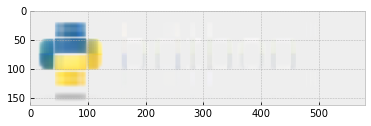

In [156]:
plt.imshow(img_reconstructed)

In [166]:
print((S[:,:N,None]*V[:,:N,:]).shape)

(4, 3, 164)


In [167]:
np.einsum('...i,...ij->...ij', S[:,:N], V[:,:N,:]).shape

(4, 3, 164)

In [168]:
x = np.einsum('...i,...ij->...ij', S[:,:N], V[:,:N,:])
y = S[:,:N,None]*V[:,:N,:]
np.allclose(x,y)

True

In [169]:
%timeit x = np.einsum('...i,...ij->...ij', S[:,:N], V[:,:N,:])

4.46 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [170]:
%timeit y = S[:,:N,None]*V[:,:N,:]

3 µs ± 78.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [171]:
%timeit x = np.stack((np.dot(U[0,:,:n], S[0,:n,None]*V[0,:n,:]), np.dot(U[1,:,:n], S[1,:n,None]*V[1,:n,:]), np.dot(U[2,:,:n], S[2,:n,None]*V[2,:n,:]),), axis = 0).T

360 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
np.array([[2,3],[2,3]]) @ np.array([[2,3],[2,3]])

array([[10, 15],
       [10, 15]])

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)

def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))


@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [8]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

Nskip = 4
img=mpimg.imread('/Users/torn/Desktop/IMG_1598 (1).png')[:,550:550+3024,:][::Nskip,::Nskip,:]
U, S, V = np.linalg.svd(img.T)

fig, ax = plt.subplots(1, figsize = (9,6))
plt.tight_layout()

@widgets.interact(n = (1, 100, 1))#, continuous_update = False)
def svd_plotter(n):
    ax.imshow((U[:,:,:n] @ (S[:,:n,None]*V[:,:n,:])).T)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=50, description='n', min=1), Output()), _dom_classes=('widget-interact',…